## Closer look at daily returns
---
![](img/1.png)

## Histogram of daily returns
---

![](img/2.png)

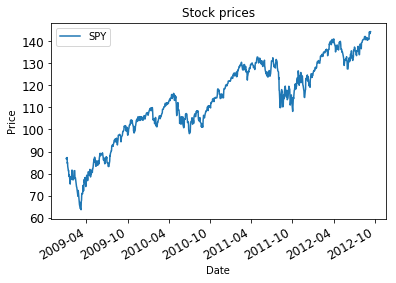

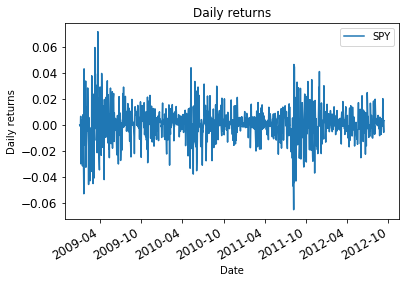

In [18]:
# how to plot a histogram

import pandas as pd
import matplotlib.pyplot as plt
from util import *

def compute_daily_returns(df):
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    daily_returns.iloc[0, :] = 0 # set daily returns for row 0 to 0
    return daily_returns

dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)
plot_data(df)

daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title='Daily returns', ylabel='Daily returns')

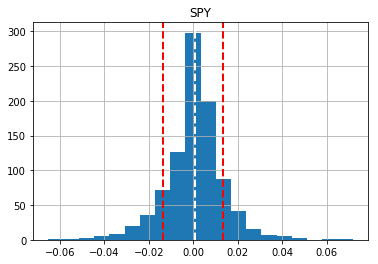

SPY    3.220278
dtype: float64


In [24]:
daily_returns.hist(bins=20)

# computing histogram statistics


mean = daily_returns['SPY'].mean()
std = daily_returns['SPY'].std()

plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

print(daily_returns.kurtosis())


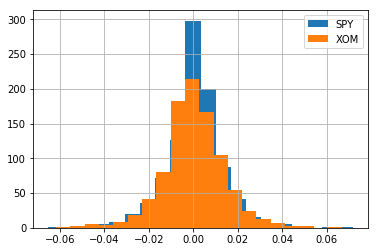

In [25]:
# compute two histograms

symbols = ['SPY', 'XOM']
dates = pd.date_range('2009-01-01', '2012-12-31')

df = get_data(symbols, dates)
daily_returns = compute_daily_returns(df)

daily_returns['SPY'].hist(bins=20, label='SPY')
daily_returns['XOM'].hist(bins=20, label='XOM')
plt.legend(loc='upper right')
plt.show()

## Scatter Plots
---

![](img/4.png)

## Slope != Correlation
---
![](img/5.png)

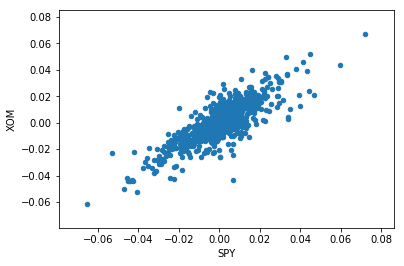

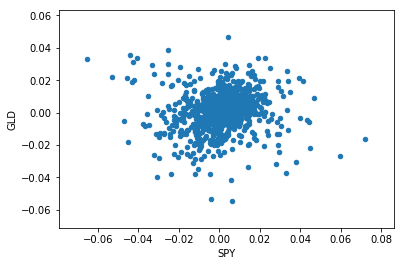

In [27]:
# scatter plots

symbols = ['SPY', 'XOM', 'GLD']
dates = pd.date_range('2009-01-01', '2012-12-31')

df = get_data(symbols, dates)
daily_returns = compute_daily_returns(df)
daily_returns.plot(kind='scatter', x='SPY', y='XOM')
plt.show()

daily_returns.plot(kind='scatter', x='SPY', y='GLD')
plt.show()

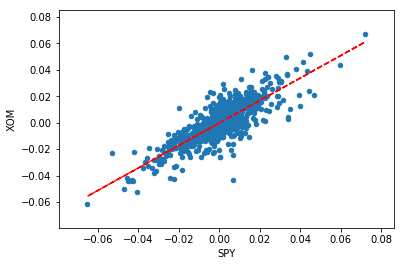

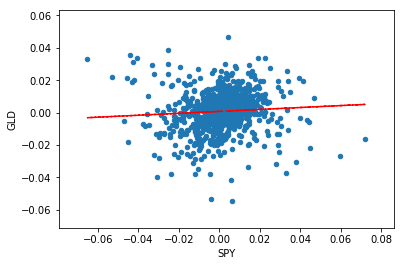

In [33]:
# beta(coefficient)와 alpha(intercept)를 함께 표시하기
import numpy as np

symbols = ['SPY', 'XOM', 'GLD']
dates = pd.date_range('2009-01-01', '2012-12-31')

df = get_data(symbols, dates)
daily_returns = compute_daily_returns(df)
daily_returns.plot(kind='scatter', x='SPY', y='XOM')
beta_xom, alpha_xom = np.polyfit(daily_returns['SPY'], daily_returns['XOM'], 1)
plt.plot(daily_returns['SPY'], beta_xom*daily_returns['SPY'] + alpha_xom, '--', color='r')
plt.show()

daily_returns.plot(kind='scatter', x='SPY', y='GLD')
beta_gld, alpha_gld = np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
plt.plot(daily_returns['SPY'], beta_gld*daily_returns['SPY'] + alpha_gld, '--', color='r')
plt.show()



In [34]:
# Calculate correlation coefficient
daily_returns.corr(method='pearson')

,SPY,XOM,GLD
SPY,1.000000,0.820241,0.067324
XOM,0.820241,1.000000,0.069687
GLD,0.067324,0.069687,1.000000
